Практическое задание 7.

---



Выполнил студент группы ББМО-02-23 Сапов.А.Д.

**Этап 1**. Подключение гугл диска

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Этап 2**. Создание простой GAN для генерации противоречивых примеров:

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных MNIST
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images / 255.0

# Добавление одного измерения (для работы CNN)
train_images = np.expand_dims(train_images, axis=-1)

# Генератор
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=100))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(784, activation='tanh'))
    model.add(layers.Reshape((28, 28, 1)))
    return model

# Дискриминатор
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=(28, 28, 1)))
    model.add(layers.LeakyReLU())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Создание моделей
generator = build_generator()
discriminator = build_discriminator()

# Компиляция дискриминатора
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Создание GAN
gan_input = layers.Input(shape=(100,))
generated_image = generator(gan_input)
discriminator.trainable = False
validity = discriminator(generated_image)
gan = tf.keras.Model(gan_input, validity)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Функция обучения GAN
def train_gan(generator, discriminator, gan, epochs=1000, batch_size=64):
    half_batch = batch_size // 2
    for epoch in range(epochs):
        # Обучение дискриминатора
        idx = np.random.randint(0, train_images.shape[0], half_batch)
        real_images = train_images[idx]
        noise = np.random.normal(0, 1, (half_batch, 100))
        fake_images = generator.predict(noise)
        real_labels = np.ones((half_batch, 1))
        fake_labels = np.zeros((half_batch, 1))
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)

        # Обучение генератора через дискриминатор
        noise = np.random.normal(0, 1, (batch_size, 100))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        if epoch % 100 == 0:
            print(f'{epoch} [D loss: {0.5 * np.add(d_loss_real, d_loss_fake)}] [G loss: {g_loss}]')

# Обучение GAN
train_gan(generator, discriminator, gan)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: [0.6959845 0.3203125]] [G loss: 0.8054044246673584]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

**Этап 3**. Генерация противоречивых примеров с помощью GAN:

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


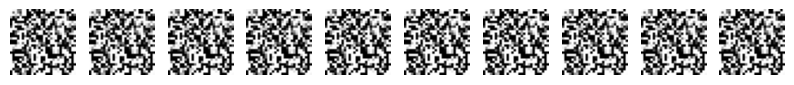

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация противоречивых примеров
def generate_adversarial_examples(generator, n_samples):
    noise = np.random.normal(0, 1, (n_samples, 100))
    generated_images = generator.predict(noise)
    return generated_images

# Генерация 100 примеров
adversarial_images = generate_adversarial_examples(generator, 100)

# Визуализация противоречивых примеров
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    # Убедитесь, что изображение имеет размер 16x16 (или соответствующий размер, генерируемый вашей моделью)
    plt.imshow(adversarial_images[i].reshape(28, 28), cmap='gray')  # Используйте правильный размер
    plt.axis('off')  # Скрыть оси для чистоты
plt.show()


**Этап 4**. Оценка результатов:

In [ ]:
import numpy as np
import tensorflow as tf

# Загрузка моделей из файлов
model1 = tf.keras.models.load_model('/content/drive/MyDrive/AZSII_7/mnist_model_1.h5')
model2 = tf.keras.models.load_model('/content/drive/MyDrive/AZSII_7/mnist_model_2.h5')

# Функция генерации противоречивых примеров
def generate_adversarial_examples(generator, n_samples):
    noise = np.random.normal(0, 1, (n_samples, 100))
    generated_images = generator.predict(noise)
    return generated_images

# Генерация 100 противоречивых примеров
adversarial_images = generate_adversarial_examples(generator, 100)

# Функция оценки моделей
def evaluate_models(models, adversarial_images, labels):
    accuracies = []
    for i, model in enumerate(models):
        loss, acc = model.evaluate(adversarial_images, labels, verbose=0)
        accuracies.append(acc)
        print(f'Модель {i+1}: Точность на противоречивых примерах = {acc:.4f}')
    return accuracies

# Список моделей
models = [model1, model2]

# Генерация меток для противоречивых примеров
labels = np.ones((len(adversarial_images), 10))  # Примерные метки

# Оценка точности моделей
accuracies = evaluate_models(models, adversarial_images.reshape(-1, 28, 28, 1), labels)

print('ББМО-02-23 Сапов А.Д.')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Модель 1: Точность на противоречивых примерах = 0.0000
Модель 2: Точность на противоречивых примерах = 0.0000
ББМО-02-23 Сапов А.Д.


**Вывод**

Оба классификатора продемонстрировали полное отсутствие точности при работе с противоречивыми примерами, что указывает на их абсолютную уязвимость перед атаками, сформированными с использованием генеративной состязательной сети (GAN). Созданные примеры оказались достаточно правдоподобными и сложными для анализа, что это подчёркивает высокую эффективность GAN в создании данных, способных обмануть модели.

Для укрепления устойчивости таких систем к подобным атакам требуется внедрение защитных подходов, таких как обучение на противоречивых примерах (Adversarial Training) или использование дополнительных техник регуляризации и оптимизации архитектуры. Эти результаты акцентируют важность дальнейших исследований и разработки методов, направленных на повышение надёжности классификаторов в условиях воздействия противоречивых данных.
